In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn
import time

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from xgboost import XGBRegressor

In [3]:
from functions_final import create_table, plot_name 
from functions_final import regplot_poly, regplot_lag, regplot_poly_fourier_lag, errorplot_poly_fourier_lag
from functions_final import predict_pfl_recur, plot_pfl_recur, predict_pfl_dir, plot_pfl_dir, predict_pfl_dir_boosted, plot_pfl_dir_boosted

In [5]:
xls = pd.ExcelFile('voornamen_jongens.xlsx')
dataframe_jongens = {}

for sheet_name in xls.sheet_names:
    dataframe_jongens[sheet_name] = xls.parse(sheet_name)

In [8]:
xls = pd.ExcelFile('voornamen_meisjes.xlsx')
dataframe_meisjes = {}

for sheet_name in xls.sheet_names:
    dataframe_meisjes[sheet_name] = xls.parse(sheet_name)

In [11]:
for df in dataframe_jongens:
    dataframe_jongens[df].columns = ['België_rang', 'België_naam', 'België_aantal', 'Vlaanderen_rang',  'Vlaanderen_naam', 'Vlaanderen_aantal', 
                                     'Wallonië_rang',  'Wallonië_naam', 'Wallonië_aantal', 'Brussel_rang',  'Brussel_naam', 
                                     'Brussel_aantal']

for df in dataframe_meisjes:
    dataframe_meisjes[df].columns = ['België_rang', 'België_naam', 'België_aantal', 'Vlaanderen_rang',  'Vlaanderen_naam', 'Vlaanderen_aantal', 
                                     'Wallonië_rang',  'Wallonië_naam', 'Wallonië_aantal', 'Brussel_rang',  'Brussel_naam', 
                                     'Brussel_aantal']

In [13]:
aantal_bel_m = create_table(dataframe_jongens, 'België', 'aantal')
aantal_bel_v = create_table(dataframe_meisjes, 'België', 'aantal')
rang_bel_m = create_table(dataframe_jongens, 'België', 'rang')
rang_bel_v = create_table(dataframe_meisjes, 'België', 'rang')

In [15]:
top_names_m = aantal_bel_m[aantal_bel_m.iloc[:,1:-1].max(axis=1) >= 50].drop('1995-2023', axis=1)
top_names_v = aantal_bel_v[aantal_bel_v.iloc[:,1:-1].max(axis=1) >= 50].drop('1995-2023', axis=1)
print(str(len(top_names_m)) + ', ' + str(len(top_names_v)))

522, 526


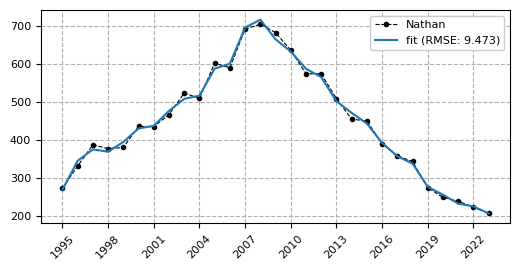

In [17]:
regplot_poly_fourier_lag(top_names_m, 'Nathan', 3, [0.5, 1, 2], 10)

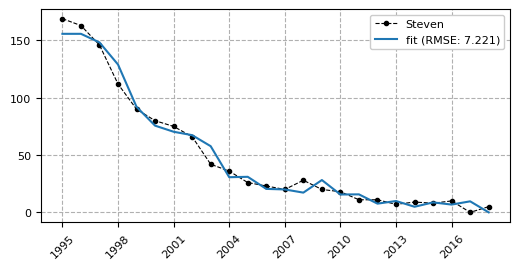

In [19]:
regplot_lag(top_names_m.iloc[:,:-5], 'Steven', 2)

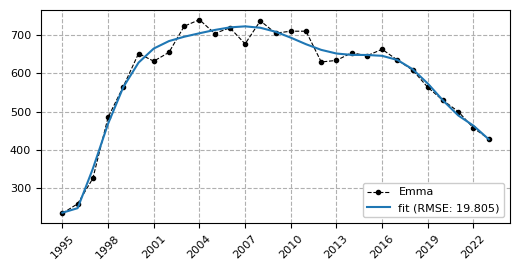

In [21]:
regplot_poly(top_names_v, 'Emma', 10)

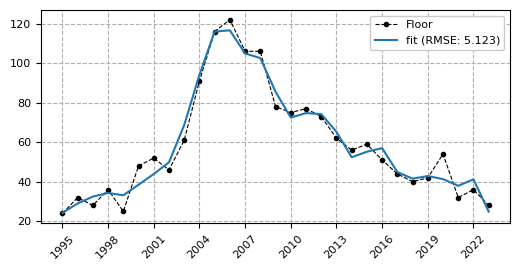

In [23]:
regplot_poly_fourier_lag(top_names_v, 'Floor', 3, [0.5, 1], 10)

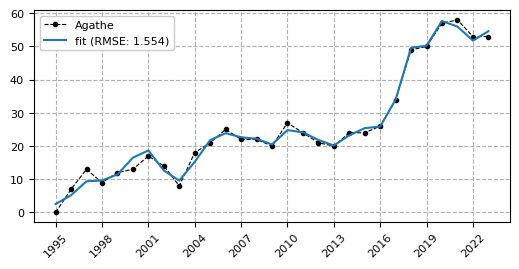

In [25]:
regplot_poly_fourier_lag(top_names_v, 'Agathe', 3, [0.5], 16)

In [27]:
RMSE, RMSE_STD = errorplot_poly_fourier_lag(top_names_v[190:290], [2, 3, 4, 5, 6], [0.5, 1, 2, 4], [2, 4, 6, 8, 10, 12])

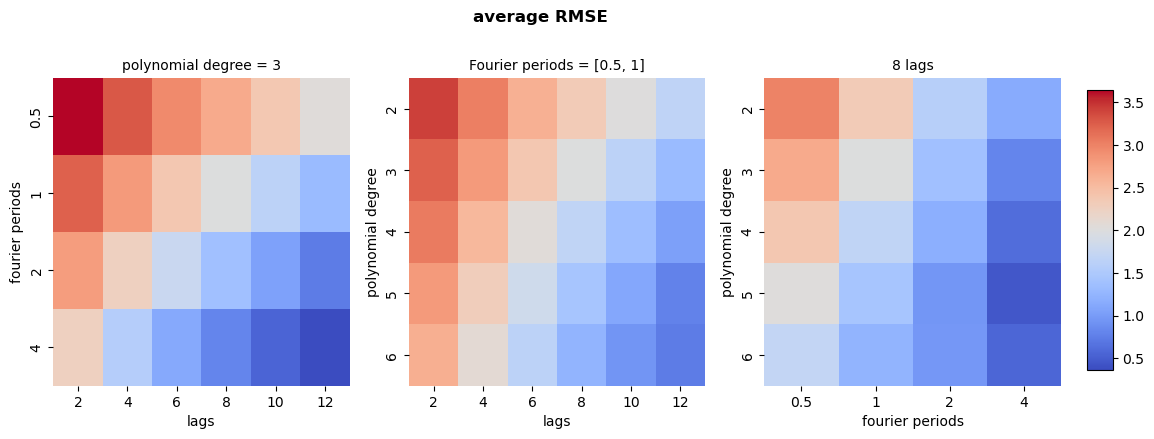

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(13,4),  gridspec_kw={'width_ratios': [1, 1, 1], 'wspace': 0.2})

vmin = min(RMSE[1].min(), RMSE[:,1,:].min(), RMSE[:,:,3].min())
vmax = max(RMSE[1].max(), RMSE[:,1,:].max(), RMSE[:,:,3].max())

fig.suptitle("average RMSE", fontsize=12, fontweight='bold', y=1.05)

hm_1 = sns.heatmap(RMSE[1], ax=axes[0], cmap="coolwarm", vmin=vmin, vmax=vmax, cbar=False, xticklabels=[2, 4, 6, 8, 10, 12], yticklabels=[0.5, 1, 2, 4])
axes[0].set_title("polynomial degree = 3", fontsize=10)
axes[0].set_xlabel("lags", fontsize=10)
axes[0].set_ylabel("fourier periods", fontsize=10)

hm_2 = sns.heatmap(RMSE[:,1,:], ax=axes[1], cmap="coolwarm", vmin=vmin, vmax=vmax, cbar=False, xticklabels=[2, 4, 6, 8, 10, 12], yticklabels=[2, 3, 4, 5, 6])
axes[1].set_title("Fourier periods = [0.5, 1]", fontsize=10)
axes[1].set_xlabel("lags", fontsize=10)
axes[1].set_ylabel("polynomial degree", fontsize=10)

hm_3 = sns.heatmap(RMSE[:,:, 3], ax=axes[2], cmap="coolwarm", vmin=vmin, vmax=vmax, cbar=False, xticklabels=[0.5, 1, 2, 4], yticklabels=[2, 3, 4, 5, 6])
axes[2].set_title("8 lags", fontsize=10)
axes[2].set_xlabel("fourier periods", fontsize=10)
axes[2].set_ylabel("polynomial degree", fontsize=10)

cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # position for the colorbar
fig.colorbar(hm_3.get_children()[0], cax=cbar_ax) 

plt.show()

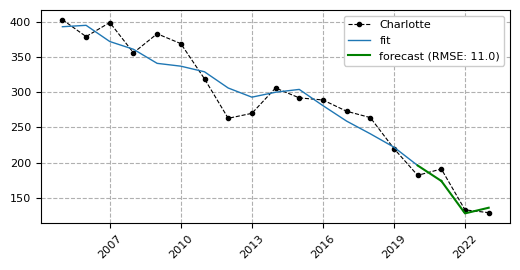

In [27]:
plot_pfl_recur(top_names_v, 'Charlotte', 3, 1, [0.5, 1], 3)

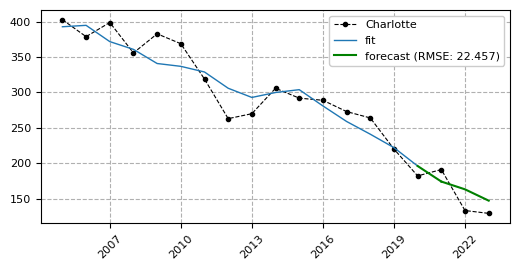

In [29]:
plot_pfl_dir(top_names_v, 'Charlotte', 3, 1, [0.5, 1], 3)

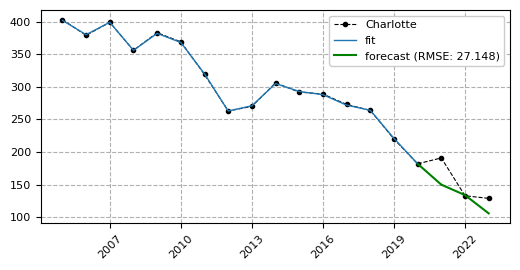

In [31]:
plot_pfl_dir_boosted(top_names_v, 'Charlotte', 3, 1, [0.5, 1], 3)

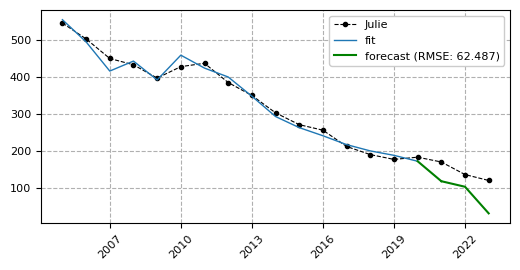

In [33]:
plot_pfl_recur(top_names_v, 'Julie', 3, 2, [0.5, 1], 8)

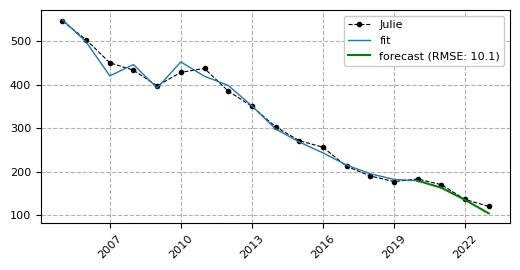

In [35]:
plot_pfl_dir(top_names_v, 'Julie', 3, 1, [0.5, 1], 8)

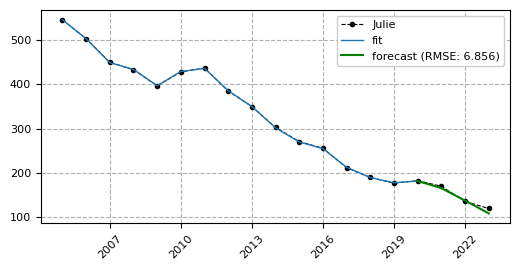

In [37]:
plot_pfl_dir_boosted(top_names_v, 'Julie', 3, 1, [0.5, 1], 8)

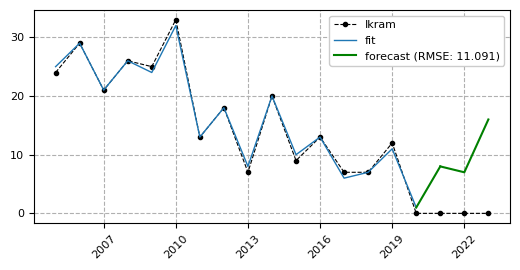

In [39]:
#plot_pfl_dir_boosted(top_names_v, 'Ikram', 3, 1, [0.5, 1], 3)
plot_pfl_dir_boosted(aantal_bel_v.iloc[:,:-1], 'Ikram', 3, 1, [0.5, 1], 3)

In [41]:
def grid_search_pfl(df, naam, steps, d, periods, lags):

    row = pd.DataFrame(df[df['naam'] == naam].iloc[0,1:]).reset_index()
    row.columns = ['jaar', 'aantal']
    row['jaar'] = np.arange(0, df.shape[1]-1, 1)
    y = row['aantal']
    
    RMSE_min = 1000
    RMSE = []
    
    for i in range(len(d)):
        for j in range(len(periods)):
            for k in range(len(lags)):
    
                y_0, y_pred = predict_pfl_dir(df.iloc[:,:-steps], naam, steps, d[i], periods[j], lags[k])
                y2 = y_pred[-steps:]
                RMSE_noboost = mean_squared_error(y2, y[-steps:])**(1/2)

                y_0, y_pred = predict_pfl_dir_boosted(df.iloc[:,:-steps], naam, steps, d[i], periods[j], lags[k])
                y2 = y_pred[-steps:]
                RMSE_boost = mean_squared_error(y2, y[-steps:])**(1/2)
    
                RMSE.append(min(RMSE_noboost, RMSE_boost))
                
                if RMSE[-1] < RMSE_min:
                    i_f = i
                    j_f = j
                    k_f = k
                    RMSE_min = RMSE[-1]
                    boost = RMSE_boost < RMSE_noboost

    return d[i_f], periods[j_f], lags[k_f], RMSE_min, boost

In [43]:
grid_search_pfl(aantal_bel_v.iloc[:,:-1], 'Ikram', 3, [0, 1, 2, 3, 4], [[0.5], [0.5, 1], [0.5, 1, 2], [0.5, 1, 2, 4]], 
                [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18])

(0, [0.5, 1], 9, 0.0, False)

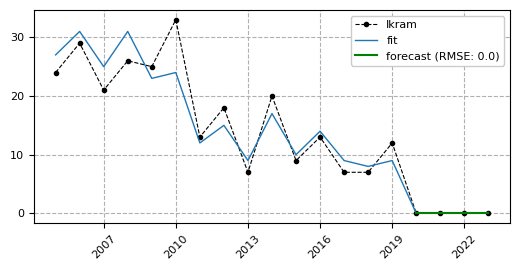

In [45]:
plot_pfl_dir(aantal_bel_v.iloc[:,:-1], 'Ikram', 3, 0, [0.5, 1], 9)

In [47]:
grid_search_pfl(top_names_v, 'Charlotte', 3, [0, 1, 2, 3, 4], [[0.5], [0.5, 1], [0.5, 1, 2], [0.5, 1, 2, 4]], 
                                                    [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18])

(1, [0.5], 7, 14.719601443879744, False)

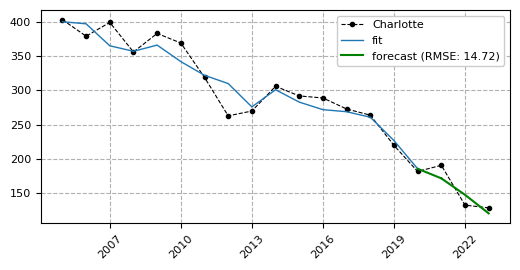

In [49]:
plot_pfl_dir(top_names_v, 'Charlotte', 3, 1, [0.5], 7)

In [51]:
grid_search_pfl(top_names_v, 'Julie', 3, [0, 1, 2, 3, 4], [[0.5], [0.5, 1], [0.5, 1, 2], [0.5, 1, 2, 4]], 
                                                    [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18])

(2, [0.5], 8, 4.320493798938574, True)

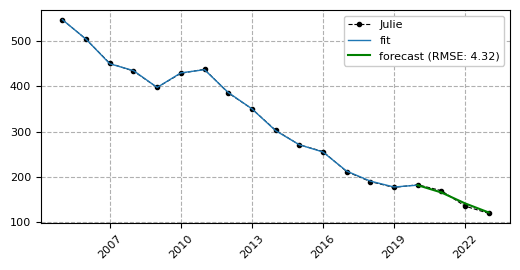

In [53]:
plot_pfl_dir_boosted(top_names_v, 'Julie', 3, 2, [0.5], 8)

In [ ]:
start_time = time.time()

steps = 3

d = [0, 1, 2, 3, 4]
periods = [[0.5], [0.5, 1], [0.5, 1, 2], [0.5, 1, 2, 4]]
lags = [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18]

df = top_names_v

top_names_v_gs = df.iloc[:,[0]]
top_names_v_gs.loc[:,['degree', 'periods', 'lags', 'RMSE_forecast', 'boosted']] = None

for i in range(len(df)):

    d_hat, periods_hat, lags_hat, RMSE_hat, boosted = grid_search_pfl(df, df.iloc[i,0], steps, d, periods, lags)

    top_names_v_gs.iloc[i, 1] = d_hat
    top_names_v_gs.iloc[i, 2] = max(periods_hat)
    top_names_v_gs.iloc[i, 3] = lags_hat
    top_names_v_gs.iloc[i, 4] = RMSE_hat
    top_names_v_gs.iloc[i, 5] = boosted

    if i % 10 == 0:
        print(str(100*(i+1)/len(df)) + '% done.')

end_time = time.time()
elapsed_time = end_time - start_time
print('')
print(f"Time: {elapsed_time:.5f} seconds")

0.19011406844106463% done.
2.091254752851711% done.
3.9923954372623576% done.
5.893536121673004% done.
7.79467680608365% done.
9.695817490494296% done.
11.596958174904943% done.
13.49809885931559% done.
15.399239543726235% done.
17.30038022813688% done.
19.20152091254753% done.
21.102661596958175% done.
23.00380228136882% done.


In [105]:
top_names_v_gs

,naam,degree,periods,lags,RMSE_forecast,boosted
651,Amber,0,0.5,2,6.97615,True
2048,Camille,0,2,5,45.581429,True
2312,Charlotte,1,0.5,7,14.719601,False
2615,Céline,1,0.5,10,1.732051,False
3657,Emma,4,0.5,2,2.44949,False
6053,Julie,2,0.5,8,4.320494,True
6856,Laura,2,0.5,6,18.574176,False
7340,Lisa,0,2,7,8.124038,True
7624,Louise,2,0.5,14,20.704267,False
8264,Manon,2,1,9,3.41565,False


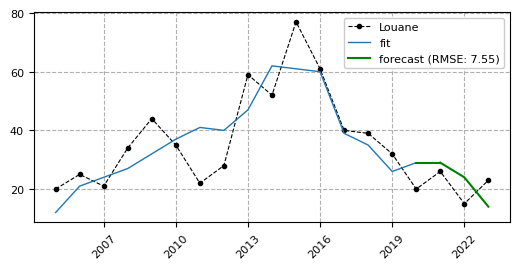

In [51]:
plot_pfl_dir(top_names_v, 'Louane', 3, 0, [0.5, 1], 4)

In [17]:
v_gs = pd.read_csv('v_gs.csv')
m_gs = pd.read_csv('m_gs.csv')

In [19]:
m_gs = m_gs.drop('Unnamed: 0', axis=1)
v_gs = v_gs.drop('Unnamed: 0', axis=1)

In [21]:
v_gs.head()

,naam,degree,periods,lags,RMSE_forecast,boosted
0,Ada,2,4.0,8,4.396969,False
1,Adeline,2,0.5,16,1.290994,False
2,Adèle,1,1.0,2,4.203173,True
3,Agathe,1,4.0,12,2.943920,False
4,Alana,0,0.5,2,2.449490,True


In [23]:
v_pred = top_names_v
m_pred = top_names_m
v_pred[['2024_pred', '2025_pred']] = None
m_pred[['2024_pred', '2025_pred']] = None

In [25]:
start_time = time.time()

for i in range(len(v_pred)):

    naam = v_pred.iloc[i, 0]
    d = v_gs.iloc[i, 1]
    max_period = v_gs.iloc[i, 2]
    lags = v_gs.iloc[i, 3]
    boosted = v_gs.iloc[i, 5]
    
    steps = 2
    
    if max_period == 0.5:
        periods = [0.5]
    elif max_period == 1:
        periods = [0.5, 1]
    elif max_period == 2:
        periods = [0.5, 1, 2]
    else:
        periods = [0.5, 1, 2, 4]

    if boosted == True:
        y_0, y_pred = predict_pfl_dir_boosted(v_pred.iloc[:,:-steps], naam, steps, d, periods, lags)
    else:
        y_0, y_pred = predict_pfl_dir(v_pred.iloc[:,:-steps], naam, steps, d, periods, lags)

    v_pred.iloc[i, -2] = y_pred.iloc[-2]
    v_pred.iloc[i, -1] = y_pred.iloc[-1]

    if (i+1) % 100 == 0:
        print(f'1/2: {100*(i+1)/len(v_pred)} % done.')

for i in range(len(m_pred)):

    naam = m_pred.iloc[i, 0]
    d = m_gs.iloc[i, 1]
    max_period = m_gs.iloc[i, 2]
    lags = m_gs.iloc[i, 3]
    boosted = m_gs.iloc[i, 5]
    
    steps = 2
    
    if max_period == 0.5:
        periods = [0.5]
    elif max_period == 1:
        periods = [0.5, 1]
    elif max_period == 2:
        periods = [0.5, 1, 2]
    else:
        periods = [0.5, 1, 2, 4]

    if boosted == True:
        y_0, y_pred = predict_pfl_dir_boosted(m_pred.iloc[:,:-steps], naam, steps, d, periods, lags)
    else:
        y_0, y_pred = predict_pfl_dir(m_pred.iloc[:,:-steps], naam, steps, d, periods, lags)

    m_pred.iloc[i, -2] = y_pred.iloc[-2]
    m_pred.iloc[i, -1] = y_pred.iloc[-1]

    if (i+1) % 100 == 0:
        print(f'2/2: {100*(i+1)/len(m_pred)} % done.')
    
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time: {elapsed_time:.5f} seconds")

1/2: 19.011406844106464 % done.
1/2: 38.02281368821293 % done.
1/2: 57.034220532319395 % done.
1/2: 76.04562737642586 % done.
1/2: 95.05703422053232 % done.
2/2: 19.157088122605366 % done.
2/2: 38.31417624521073 % done.
2/2: 57.47126436781609 % done.
2/2: 76.62835249042146 % done.
2/2: 95.78544061302682 % done.
Time: 29.50481 seconds


In [ ]:
#v_pred.sort_values(by='2024_pred', ascending=False).head(10)

In [ ]:
#v_pred.sort_values(by='2023', ascending=False).head(10)

In [25]:
v_gs[v_gs['naam'].isin(['Alba','Olivia'])]

,naam,degree,periods,lags,RMSE_forecast,boosted
5,Alba,4,2.0,16,23.867691,False
427,Olivia,1,0.5,2,49.802945,False


In [29]:
#plot_pfl_dir(v_pred, 'Alba', 2, 4, [0.5, 1, 2], 16)

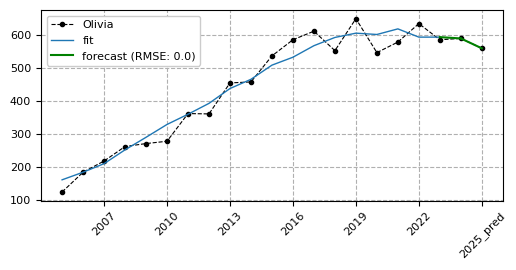

In [35]:
plot_pfl_dir(v_pred, 'Olivia', 2, 1, [0.5], 2)

In [37]:
rang_bel_v[rang_bel_v['naam'] == 'Alba']

,naam,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,1995-2023
335,Alba,0.0,1000.0,1159.0,0.0,1173.0,826.0,986.0,0.0,1234.0,...,476.0,521.0,421.0,336.0,282.0,97.0,45.0,20.0,20.0,273


In [ ]:
#m_pred.sort_values(by='2024_pred', ascending=False).head(10)

In [ ]:
#m_pred.sort_values(by='2023', ascending=False).head(10)

In [300]:
def plot_pred(df, names):

    keys = list(range(1995, 2025))
    
    fig, ax = plt.subplots(figsize=(7,4))
    x1 = keys[:-1]
    x2 = keys[-1]+1
    
    colors=['darkorange', 'forestgreen', 'royalblue', 'firebrick', 'darkorchid', 'goldenrod', 'chocolate']
    
    for i in range(len(names)):
    
        y_pred = df[df['naam'] == names[i]].iloc[0,1:]
        y1 = y_pred.iloc[:-2]
        y2 = y_pred.iloc[-2]
    
        ax.plot(x1[20:], y1[20:], linestyle='--', lw=1.0, marker='o', ms=4, label=names[i], color=colors[i]);
        ax.plot(x2, y2, lw=2, color=colors[i]);
        ax.plot([x1[-1], x2], [y1.iloc[-1], y2], lw=2.5, marker='o', ms=4, color=colors[i]);

        if (i == 0) or (i == 4):
            ax.annotate(names[i], xy=(x2, y2), xytext=(x2 + 0.2, y2 + 10), color=colors[i], fontsize=12, verticalalignment="center")
        elif (i == 5) or (i == 3):
            ax.annotate(names[i], xy=(x2, y2), xytext=(x2 + 0.2, y2 - 10), color=colors[i], fontsize=12, verticalalignment="center")
        else:
            ax.annotate(names[i], xy=(x2, y2), xytext=(x2 + 0.2, y2), color=colors[i], fontsize=12, verticalalignment="center")
    
    ax.grid(ls='--');
    xticks = keys[20:]
    xticks[-1] += 1
    plt.xticks(xticks, fontsize=8, rotation=45, labels=keys[20:]);
    plt.yticks(fontsize=8);
    plt.xlim(2014,2027);
    
    plt.tight_layout(pad=0) 
    plt.savefig('forecast.png', format='png')
    plt.show()

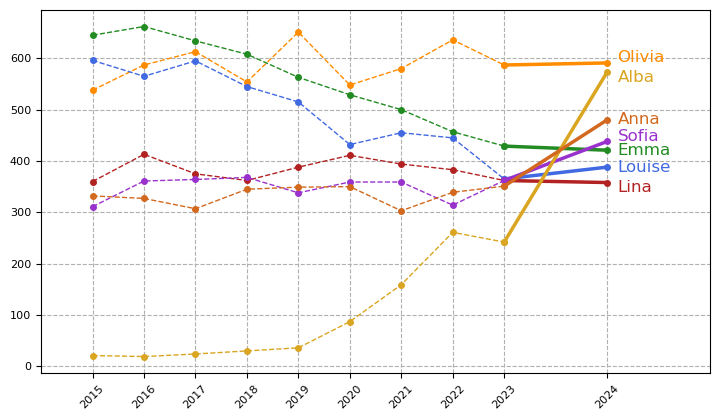

In [302]:
plot_pred(v_pred, ['Olivia', 'Emma', 'Louise', 'Lina', 'Sofia', 'Alba', 'Anna'])

In [95]:
bel20 = pd.read_csv('BEL20.csv')
bel20.head()

,time,BEL 20,volume
0,2025-03-26 18:05,4434.15,0
1,2025-03-27 09:00,4418.59,0
2,2025-03-27 09:01,4419.56,0
3,2025-03-27 09:02,4420.83,0
4,2025-03-27 09:03,4420.84,0


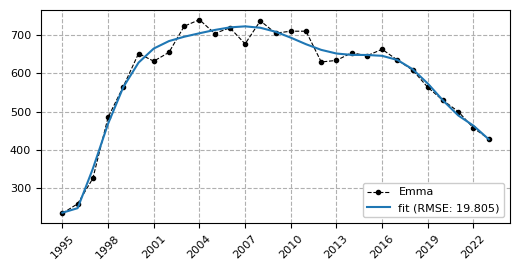

In [113]:
regplot_poly(top_names_v.iloc[:,:-2], 'Emma', 10)

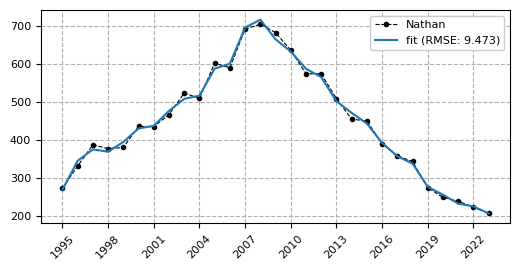

In [109]:
regplot_poly_fourier_lag(top_names_m.iloc[:,:-2], 'Nathan', 3, [0.5, 1, 2], 10)